# INTRODUCTION

- The Titanic was a British passenger liner that sank on its maiden voyage from Southampton to New York City after hitting an iceberg on April 14, 1912. Of the over 2,200 passengers and crew aboard, more than 1,500 lost their lives. The ship was considered "unsinkable" due to its advanced design and safety features. The tragedy led to significant changes in maritime safety regulations. The Titanic's story remains one of the most famous maritime disasters in history.

<font color = 'yellow' >
Content: 

1. [Load and Check Data](#1)
2. [Variable Description](#2)
2. [Univariate Variable Analysis](#3)
    * [Categorical Variable](#4)
    * [Numerical Variable](#5)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## 1. Load and Check Data
<a id = "1"></a><br>

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassengerId = test_df["PassengerId"] # We saved test_PassengerId because we will use it later. Since we will perform many operations on test_df, we don't want to lose the original PassengerId. Therefore, we assigned it to a variable to use in later stages.

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 2. Variable Description
<a id = "2"></a><br>


1. PassengerId: A unique identifier for each passenger.
1. Survived: Indicates whether the passenger survived (1) or not (0).
1. Pclass: The passenger's class on the ship, with 1 being the highest (first class), 2 the middle (second class), and 3 the lowest (third class).
1. Name: The full name of the passenger.
1. Sex: The gender of the passenger (male or female).
1. Age: The age of the passenger.
1. SibSp: The number of siblings or spouses the passenger had aboard the Titanic.
1. Parch: The number of parents or children the passenger had aboard the Titanic.
1. Ticket: The ticket number assigned to the passenger.
1. Fare: The fare the passenger paid for the ticket.
1. Cabin: The cabin number assigned to the passenger.
1. Embarked: The port where the passenger boarded the Titanic. (C = Cherbourg; Q = Queenstown; S = Southampton)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare, Age
* int64(5)  : PassengerId, Survived, Pclass, SibSp, Parch
* object(5) : Name, Sex, Ticket, Cabin, Embarked

## 3. Univariate Variable Analysis
<a id = "3"></a><br>
* Categorical Variable : Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp, and Parch
* Numerical Variable  : Age, PassengerId, and Fare

### Categorical Variable:
<a id = "4"></a><br>

In [7]:
def bar_plot(variable):
    """
        input: variable ex.: "Sex"
        output: bar plot & value count
    """
    
    # get feature
    var = train_df[variable]
    # count number of categorical variable (value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

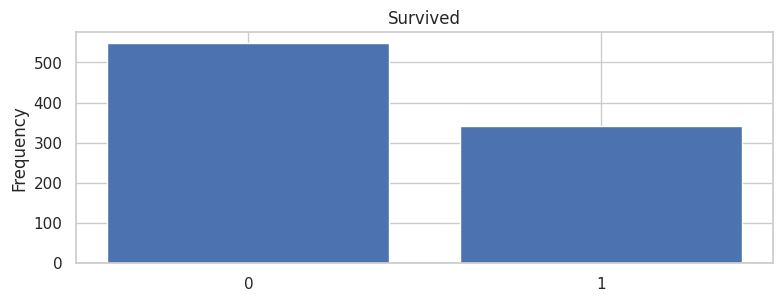

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


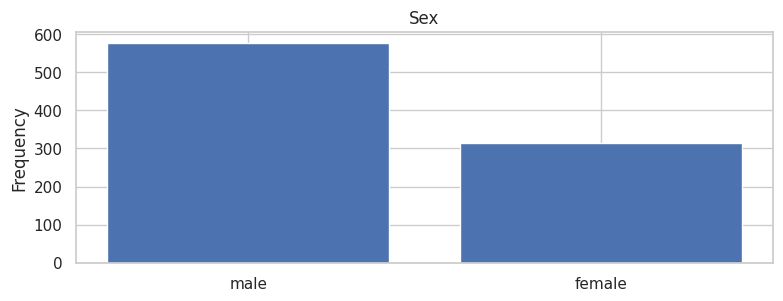

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


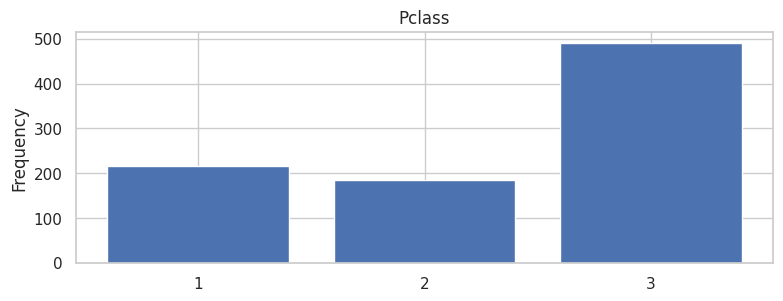

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


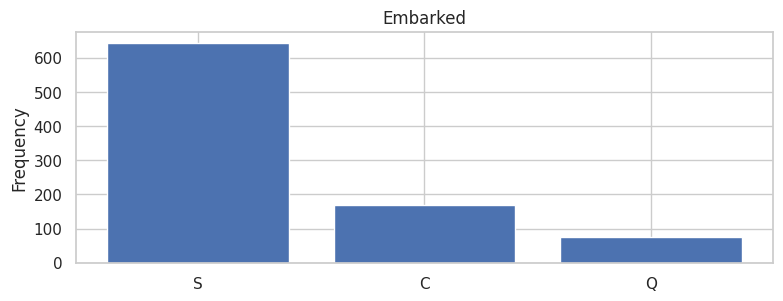

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


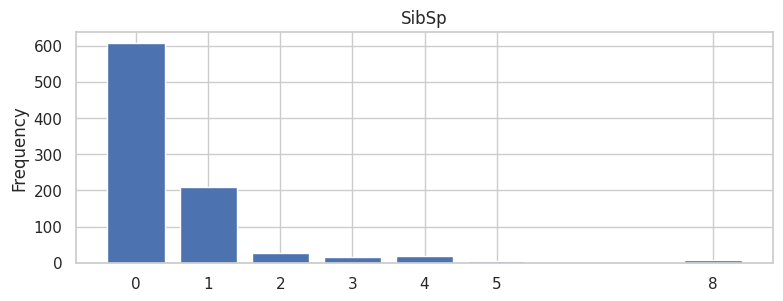

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


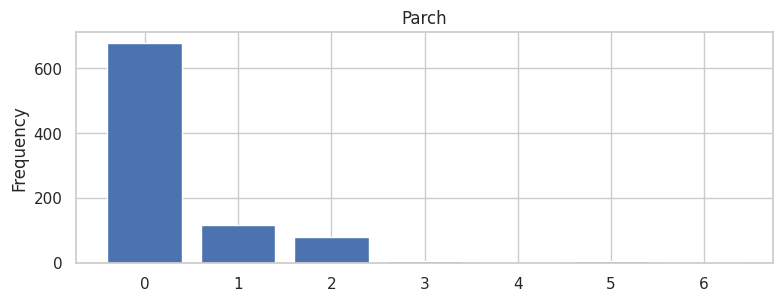

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [8]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for c in category1:
    bar_plot(c)

### Numerical Variable:
<a id = "5"></a><br>